# 0 - Information

In [1]:
# Author: Pierre Oreistein
# Last edit: 06/06/2021

# 1 - Packages

## 1.1 - Mainstream Packages

In [24]:
# Maths Packages
import numpy as np

# Data Handling Packages
import pandas as pd

# Graphics packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Utils
from colorama import Fore, Back, Style
from IPython.display import display, HTML

## 1.2 - Personnal Utils

In [3]:
class COLOR:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
def display_check(boolean: bool) -> str:
    """
    Display the boolean with color and bold for easier understanding.
    """
    # If the boolean is True
    if boolean:
        return COLOR.BOLD + Back.GREEN + "True" + Style.RESET_ALL
    else:
        return COLOR.BOLD + Back.RED + "False" + Style.RESET_ALL
    
def display_title(title: str) -> None:
    """Display title"""
    print(f"----- {COLOR.BOLD} {title} {Style.RESET_ALL} -----")
    
def display_dataframe(df: pd.DataFrame) -> None:
    """Pretty display inside Jupyter Notebook of DataFrames."""
    display(HTML(df.to_html()))

# 2 - Load Data

In [4]:
# Load the data
train_raw_df = pd.read_csv("./Data/01_Raw_Data/train.csv")

# Display the raw data
display_dataframe(train_raw_df.head(5))

,id,l1_category_name,l2_category_name,l3_category_name,title,category_id,price
0,7f1f33cf-a59a-4114-8f9e-cf3effaa2341,Men's Fashion,Men's Watches,NaN,Fossil Leather Watch,20,100.56
1,88765cd5-3f53-403c-841a-12dc367843c9,Men's Fashion,Men's Watches,NaN,* FREE DELIVERY * JDM Brand New 100% Authentic Seiko Presage White Dial & Blue Hands Men's Automatic Dress Watch SARX033,20,1008.37
2,264e2900-ba35-4ac0-8858-e2fcb0909e6d,Men's Fashion,Men's Watches,NaN,St Dupont Classic Pen,20,220.31
3,ffc7337a-7d04-4fa8-a136-ac9d8413f8e8,Men's Fashion,Men's Watches,NaN,CASIO G-SHOCK GX-56BB-1DR / GX-56BB-1D / GX-56BB-1 / GX-56BB TOUGH SOLAR WATCH,20,104.95
4,34a2e32c-db54-4aff-b89d-173bacbac346,Men's Fashion,Men's Watches,NaN,Fossil Townsman Twist ME1164P,20,166.37


In [5]:
# Load the data
X_test_raw_df = pd.read_csv("./Data/01_Raw_Data/test.csv")

# Display the raw data
display_dataframe(X_test_raw_df.head(5))

,id,title,price
0,c90123c0-09a2-4d0d-8ddd-447cd12edd4a,Yeezy boost 350 V2 Core Black/Ref,402.41
1,e1dc8ac7-6a89-4ef9-a790-3f4d0835aaf7,Nakamichi Sports Bluetooth Earphones,44.93
2,520743b2-6c83-4ba9-98a2-3d2fff697fa2,Tefal Steam Cuisine 900 Turbo Diffusion,104.00
3,e5136110-bd9b-4011-81f3-de904d916c91,B5 Lofter High Gain Wireless USB Adapter 1200Mbps,21.64
4,a459aa14-7e28-4a95-8c98-690509c373db,Taiwan Customize Handmade APO Float,41.60


# 3 - Data Exploration

## 3.1 - Explore the consistency of the data

In [6]:
# Check for the number of samples
display_title("Number of samples")
print(train_raw_df.shape[0], "samples")
print("\n")

# Check the number of samples per category_id
display_title("Number of samples per 'category_id'")
nb_samples_df = train_raw_df.groupby("category_id").size().to_frame(name="Number of samples")
display_dataframe(nb_samples_df)
print(f"Minimal number of samples: {nb_samples_df.min().iloc[0]}")
print(f"Average number of samples: {nb_samples_df.mean().iloc[0].round(0)}")
print("\n")

# Check for nans
nan_df = (train_raw_df.isna().sum() / len(train_raw_df) * 100).round(2)
nan_df = nan_df.to_frame(name="Percentage_of_Nans")

display_title(f"Percentage of Nan for each column")
display_dataframe(nan_df)

-----  Number of samples  -----
144692 samples


-----  Number of samples per 'category_id'  -----


,Number of samples
category_id,
1,9123
2,6591
3,6415
4,2579
5,8595
6,10279
7,2287
8,255
9,2909


Minimal number of samples: 92
Average number of samples: 5565.0


-----  Percentage of Nan for each column  -----


,Percentage_of_Nans
id,0.00
l1_category_name,0.00
l2_category_name,0.00
l3_category_name,67.98
title,0.00
category_id,0.00
price,0.00


Comments
-----

That's a good news! we have a good number of samples (even if it is a bit unbalanced for some categories) and only one column possess Nans. Let's investigate why

## 3.2 - Explore Categories Names

### 3.2.1 - Explore all the categories name for each level

In [7]:
# Display the categoryies names of the different level: l1, l2, l3
for l in range(1, 4):
    display_title(f"Category Level {l}")
    print(train_raw_df[f"l{l}_category_name"].unique())
    print("\n")

-----  Category Level 1  -----
["Men's Fashion" 'Health & Beauty' 'Books & Stationery' 'Electronics'
 'Music & Media' 'Sports' 'Toys & Games' 'Mobile Phones & Tablets'
 "Women's Fashion" 'Furniture' 'Car Accessories' 'Gardening'
 'Home Appliances']


-----  Category Level 2  -----
["Men's Watches" 'Makeup' 'Comics & Manga' 'Audio'
 'Computer Parts & Accessories' 'Music Instruments'
 'Sports & Games Equipment' 'Video Gaming' 'Toys & Board Games - Others'
 'Mobile Phones & Tablets - Others' "Women's Clothes" 'Shelves & Drawers'
 'Android Phones' 'Non-Fiction' 'Face & Skin Care' 'Electronics & Lights'
 'Plants' 'Gardening Tools & Ornaments' 'Kitchenware' "Men's Footwear"
 "Men's Accessories" "Men's Clothes" "Women's Shoes" "Women's Accessories"]


-----  Category Level 3  -----
[nan 'Video Games' 'Pants, Jeans & Shorts' 'LG' 'Sneakers' 'Boots'
 'Others' 'Tops' 'Belts']




### 3.2.2 - Explore the hierarchy between the categories names

In [8]:
# Display the categoryies names of the different level: l1, l2, l3
grouped_df = train_raw_df.groupby(["l1_category_name", "l2_category_name"]).l3_category_name.unique()
grouped_df = grouped_df.apply(lambda x: x[0])
grouped_df = grouped_df.to_frame(name="l3_category_name")

# Display the hierarchy of the categories names
display_dataframe(grouped_df)

Comments
-----

We can notice that the category goes from the most general to the most detailed. Category level 1 being the most general.

This fact, could explain why __l3_category_name__ has more nan than the others columns has some categories may not have sub_categories of level three like "Non-Fiction" which is a category already quite specific.

## 3.3 - Explore the relationship between categories level and categories id

### 3.3.1 - Explore the relationship between 'l1_category_name' and 'category_id'

In [9]:
def check_association(df: pd.DataFrame, index_column: str, target_column: str) -> None:
    """Check the association between two columns."""
    # Check if each 'index_column' is associated with one and only one 'target_column'
    index_col_vs_target_col_s = df.groupby(index_column)[target_column].unique()
    sizes_s = index_col_vs_target_col_s.apply(lambda x: len(x))
    check_1 = len(sizes_s.unique()) == 1
    
    display_title(f"Number of '{target_column}' associated with each '{index_column}'")
    display_dataframe(sizes_s.to_frame())
    print("\n")
    print(f"Only one '{target_column}' is associated with each {index_column}? {display_check(check_1)}")
    print("\n")

    # Check which '{target_column}' is asoociated with each '{index_col}'
    display_title(f"Association of the '{index_column}' and '{target_column}'")
    display_dataframe(index_col_vs_target_col_s.to_frame())
    print("\n")

In [10]:
check_association(df=train_raw_df, index_column="category_id", target_column="l1_category_name")

-----  Number of 'l1_category_name' associated with each 'category_id'  -----


,l1_category_name
category_id,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1




Only one 'l1_category_name' is associated with each category_id? True


-----  Association of the 'category_id' and 'l1_category_name'  -----


,l1_category_name
category_id,
1,[Toys & Games]
2,[Toys & Games]
3,[Sports]
4,[Music & Media]
5,[Electronics]
6,[Electronics]
7,[Books & Stationery]
8,[Women's Fashion]
9,[Women's Fashion]


Comments
-----

For this first display, we can observe that only one __l1_category_name__ is associated with a each __category_id__. It is a good news for our future modelisation as it means that __l1_category_name__ are correlated with each other and refer certainly to the same concept.

We can also notice that __category_id__ seems to be more specific than __l1_category_name__. Indeed, we can notice that some __l1_category_name__ can be associated with several __category_id__. 

In the next cells, we will therefore investigate the relationship between __category_id__ and __l2_category_name__ and __l3_category_name__

### 3.3.2 - Explore the relationship between 'l2_category_name' and 'category_id'

In [11]:
check_association(df=train_raw_df, index_column="category_id", target_column="l2_category_name")

-----  Number of 'l2_category_name' associated with each 'category_id'  -----


,l2_category_name
category_id,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1




Only one 'l2_category_name' is associated with each category_id? True


-----  Association of the 'category_id' and 'l2_category_name'  -----


,l2_category_name
category_id,
1,[Toys & Board Games - Others]
2,[Video Gaming]
3,[Sports & Games Equipment]
4,[Music Instruments]
5,[Computer Parts & Accessories]
6,[Audio]
7,[Comics & Manga]
8,[Women's Accessories]
9,[Women's Shoes]


Comments
-----

For this second display, we can observe that only one __l2_category_name__ is associated with a each __category_id__. It is a good news for our future modelisation as it means that __l2_category_name__ are correlated with each other and refer certainly to the same concept.

We can also notice that __category_id__ seems to be more specific than __l2_category_name__. Indeed, we can notice that some __l2_category_name__ can be associated with several __category_id__. 

In the next cells, we will therefore investigate the relationship between __category_id__ and __l3_category_name__

### 3.3.3 - Explore the relationship between 'l3_category_name' and 'category_id'

In [12]:
check_association(df=train_raw_df, index_column="category_id", target_column="l3_category_name")

-----  Number of 'l3_category_name' associated with each 'category_id'  -----


,l3_category_name
category_id,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1




Only one 'l3_category_name' is associated with each category_id? True


-----  Association of the 'category_id' and 'l3_category_name'  -----


,l3_category_name
category_id,
1,[nan]
2,[Video Games]
3,[nan]
4,[nan]
5,[nan]
6,[nan]
7,[nan]
8,[Belts]
9,[Sneakers]


Comments
-----

For this third display, we can observe that only one __l3_category_name__ is associated with a each __category_id__. However, we can also observe that in many cases, the __l3_category_name__ is not registered and therefore __category_id__ is associated with a 'nan'.

Despite, the nan, we can also notice that one and only one __l3_category_name__ is associated with a __category_id__. This indicates that __category_id__ is certainly a concept close __l3_category_name__. Both share a similar level of granularity / details

### 3.3.4 - Explore association between 'category_id' and 'l1_category_name'

In [26]:
check_association(df=train_raw_df, index_column="l1_category_name", target_column="category_id")

-----  Number of 'category_id' associated with each 'l1_category_name'  -----


,category_id
l1_category_name,
Books & Stationery,2
Car Accessories,1
Electronics,2
Furniture,1
Gardening,2
Health & Beauty,2
Home Appliances,1
Men's Fashion,5
Mobile Phones & Tablets,2




Only one 'category_id' is associated with each l1_category_name? False


-----  Association of the 'l1_category_name' and 'category_id'  -----


,category_id
l1_category_name,
Books & Stationery,"[7, 22]"
Car Accessories,[19]
Electronics,"[6, 5]"
Furniture,[24]
Gardening,"[18, 17]"
Health & Beauty,"[11, 21]"
Home Appliances,[16]
Men's Fashion,"[20, 15, 14, 13, 12]"
Mobile Phones & Tablets,"[26, 23]"


Comments
-----

This tabole is also interesting. We can note that for most of the 'l1_category_name', there is in average only 2 category_id associated. As the 'l1_category_name' are more orthogonally opposed between each other than the category_id (as the category_id is more granular), it could be interesting to consider the 'l1_category_name' as the target.

## 3.4 - Exploration of the price feature

### 3.4.1 - Display the distribution of the price gloablly

### 3.4.1 - Global Distribution of the price

In [13]:
# Check the column price: maximum, minimum, average
display_title("Price description in the training set")
display_dataframe(train_raw_df.price.describe().to_frame())
print("\n")

-----  Price description in the training set  -----


,price
count,1.446920e+05
mean,5.675725e+06
std,1.475379e+09
min,0.000000e+00
25%,1.029000e+01
50%,2.750000e+01
75%,8.705250e+01
max,5.353219e+11


In [14]:
# Check the column price: maximum, minimum, average
display_title("Price description in the test set")
display_dataframe(X_test_raw_df.price.describe().to_frame())
print("\n")

-----  Price description in the test set  -----


,price
count,4.856000e+04
mean,3.066621e+07
std,6.717845e+09
min,0.000000e+00
25%,1.064750e+01
50%,2.815000e+01
75%,8.751250e+01
max,1.480357e+12


Comments
-----

First of all some prices goes as high as 1,400 Billions SGD! (both in the training and testing set).  It most likely a mistake. Let's analyse these special listings more closely.

In [15]:
def filter_and_display_high_price_listings(df: pd.DataFrame, price_threshold: float=1e9) -> None:
    """Filter and display high price listings in df."""
    # Keep only high price listings
    temp_df = df[df["price"] > price_threshold]

    # Display the listings with high prices
    display_title(f"Listings with a price above {price_threshold} SGD")
    display_dataframe(temp_df)
    print(f"Number of listings with high price: {temp_df.shape[0]}")
    print("\n")

In [16]:
# Define a threshold for high prices transactions
HIGH_PRICE_THRESHOLD = 1e7 # = 10 Millions

# Filter the dataFrame and display only listings with high prices
filter_and_display_high_price_listings(df=train_raw_df, price_threshold=HIGH_PRICE_THRESHOLD)

-----  Listings with a price above 10000000.0 SGD  -----


,id,l1_category_name,l2_category_name,l3_category_name,title,category_id,price
700,322647b7-501f-45c6-b87f-58b241b1e0d8,Men's Fashion,Men's Watches,NaN,Rolex GMT Master II Collection,20,6.366952e+09
920,ba820acc-c161-47b1-b9fd-4ee5b13c19d3,Men's Fashion,Men's Watches,NaN,PP current dated,20,1.059878e+10
1335,d08e063f-bea6-4244-9f7c-61a92306265c,Men's Fashion,Men's Watches,NaN,Rolex Watches (current dated),20,1.245544e+11
2855,77885882-4d8b-46a6-8800-3b3ad890cbfc,Men's Fashion,Men's Watches,NaN,PP current dated,20,9.345585e+07
3231,6fe376db-6095-48f1-94c0-ebac50a070e8,Men's Fashion,Men's Watches,NaN,WTB ALL ROLEX MODELS,20,1.379835e+10
3941,466253a6-6af3-484c-9f24-cbd0d5bac806,Men's Fashion,Men's Watches,NaN,Cartier WSSA 0009,20,4.725307e+09
4642,666abec3-19f3-41ec-98b7-d62ba4f6dea3,Men's Fashion,Men's Watches,NaN,Omega 2020 Tokyo limited edition,20,9.505474e+09
35888,6dd75fc7-fc89-4fbf-ab4a-a90210460b54,Music & Media,Music Instruments,NaN,WTB used audio equipment and music instruments,4,7.017966e+07
43198,aaeaaea1-13de-431d-bfee-ac91243f0297,Toys & Games,Video Gaming,Video Games,WTB > ALL ARCANAS!,2,1.337240e+08
43469,ab85ce83-f1b6-4a2f-b052-3f557dd43604,Toys & Games,Video Gaming,Video Games,PUBG Rank Boost,2,5.353219e+11


Number of listings with high price: 24




In [17]:
# Filter the dataFrame and display only listings with high prices
filter_and_display_high_price_listings(df=X_test_raw_df, price_threshold=HIGH_PRICE_THRESHOLD)

-----  Listings with a price above 10000000.0 SGD  -----


,id,title,price
18791,72e96cd4-a36b-4828-b95e-b1adcc8fece9,LOOKING FOR LOOKING FOR,5.631129e+07
19250,1454c2dc-1800-4ca0-abfe-7f68ddc44915,Rolex Daytona,4.959739e+09
20508,4d177cef-a5dc-4a38-9a73-c08373cd1e84,Mask,1.480357e+12
22215,b2204ffc-c752-4611-9c5c-c13776235251,Rare Korean White Pearl Mulberry Sapling (Only for serious buyer),1.691564e+09
23260,3ce77f1b-140e-4a1e-99ad-00ae4d26798b,LOOKING FOR DATEJUST 31MM,6.013754e+07
37021,c765b5c4-6881-45df-bb1e-f6c0c06955a8,Rolex GMT DISCONTINUED MODEL,7.094566e+08
40863,07fe6076-69e0-407e-a00f-ec4c1c2ff269,(NOT FOR SALE) it's for my customers to leave review and make offer.,1.116872e+08
46021,ef482f21-a808-4ecb-bf14-28b1ac5edb6f,PP 5712R-001 current date,1.180598e+09


Number of listings with high price: 8




Comments
-------

We can notice than most of the listings above 10 millions corresponds to fashion items like clothes or watches. Even if some rare watches can cost more than 10 Millions SGD, such prices on Carousell seems unlikedly.

Dealing with such samples is not easy as we can find similar samples in the testing set. We cannot simply disgard them. Instead, we will try towo approaches in the next cells:
   * clip the price to a maximum of 10 millions SGD 
   * apply a logarithm transformation on the price to keep all the prices in the same range.

In [18]:
def scale_transform_price_feature(
    df: pd.DataFrame,
    epsilon: float=1e-15,
    high_price_threshold: float=1e7
) -> pd.DataFrame:
    """Apply a log transformation to the price feature."""
    # Clip price value to a maximum of 
    df["price"].clip(lower=0, upper=high_price_threshold, inplace=True)
    
    # Apply a log transformation on df with an epsilon to manage negative or null values
    df["price"] = df["price"].apply(lambda x: np.log(x + epsilon))

    return df

In [19]:
# Apply the log transform to the train and test set
train_df = scale_transform_price_feature(train_raw_df.copy())
X_test_df = scale_transform_price_feature(X_test_raw_df.copy())

### 3.4.2 - Analysis of the price per 'category_id'

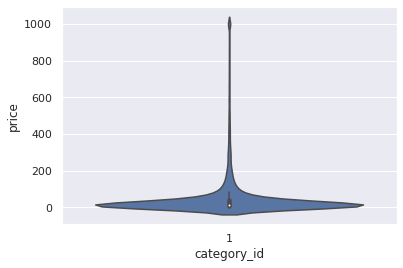

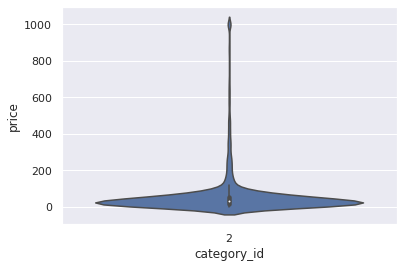

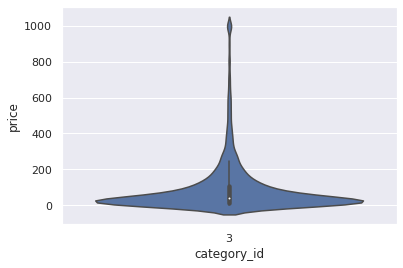

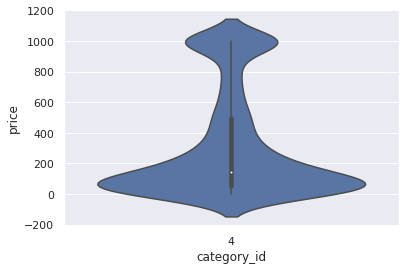

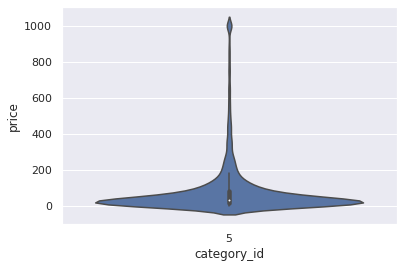

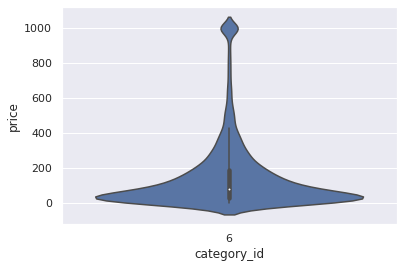

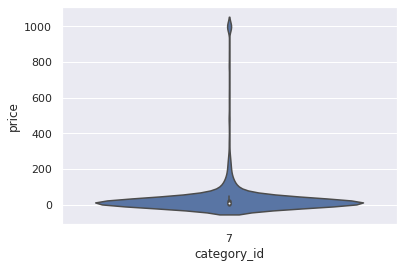

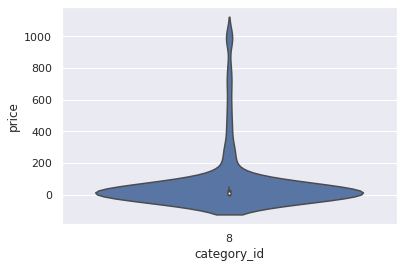

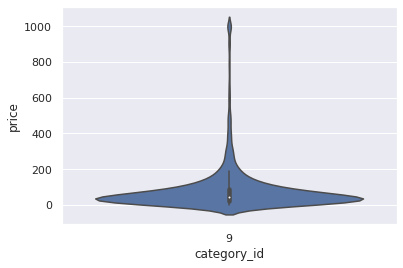

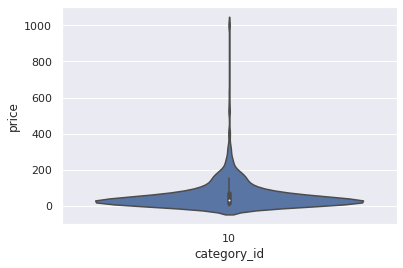

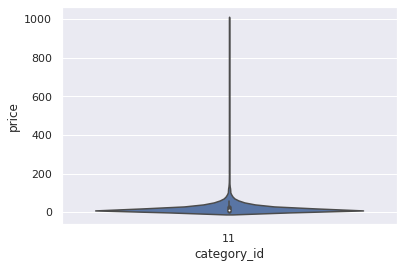

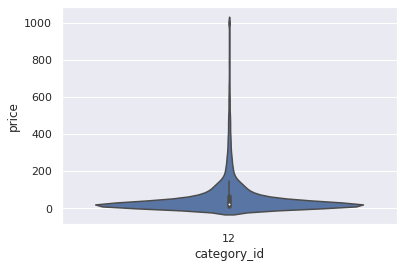

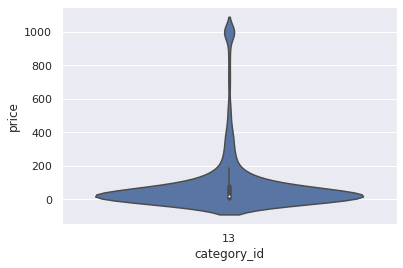

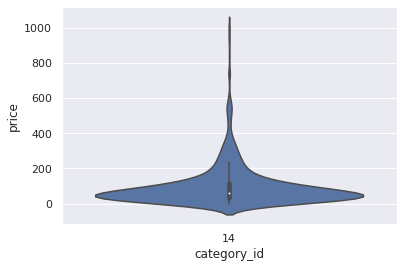

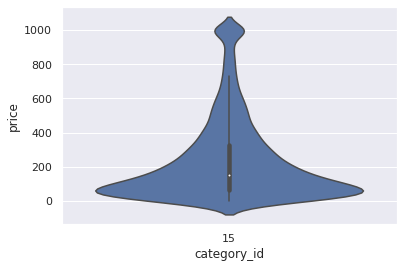

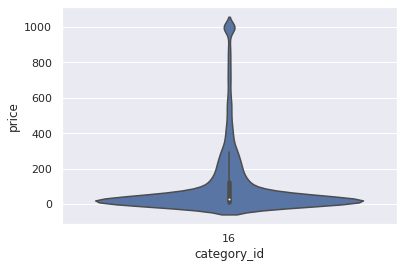

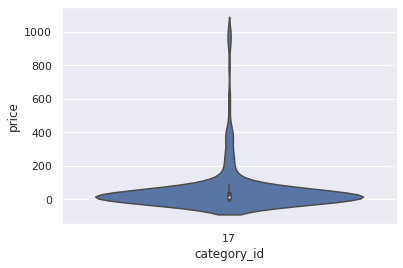

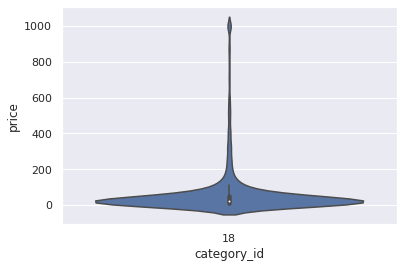

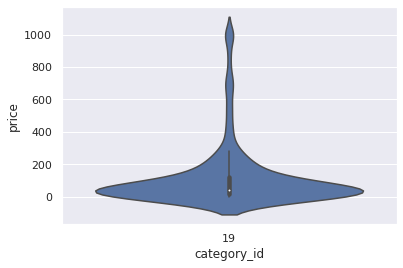

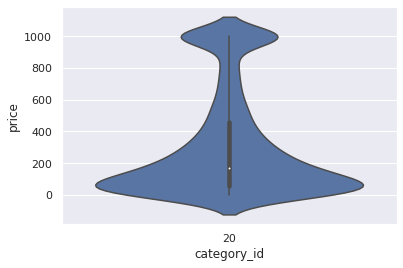

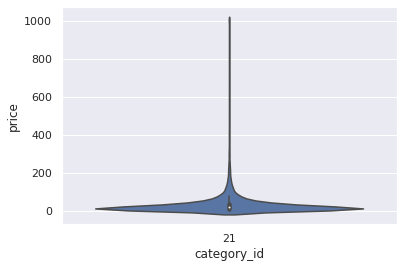

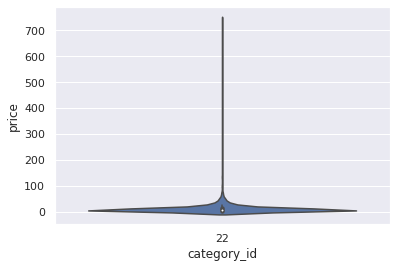

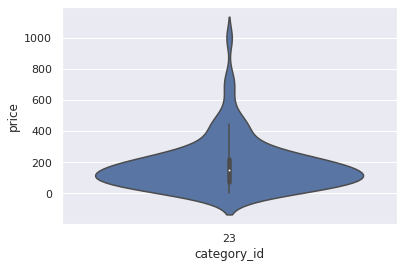

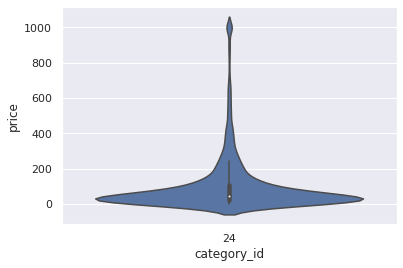

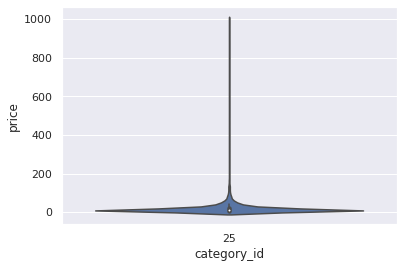

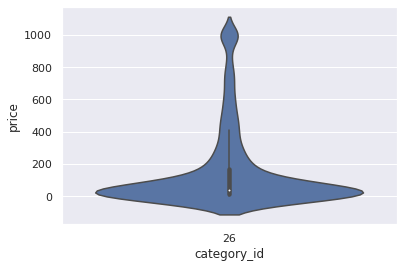

In [20]:
# Let's do a violin plot of the price before log transform for each 'category_id'
grouped_df = train_raw_df.groupby("category_id")

for category_id, g_df in grouped_df:
    
    # Add 'category_id' to g_df
    g_df["category_id"] = category_id
    g_df["price"].clip(lower=0, upper=1000, inplace=True)
    
    # Plot the violin plot
    sns.violinplot(
        data=g_df,
        x="category_id",
        y="price",
    )
    
    plt.show()

# Delete grouped_df to avoid further interferences
del grouped_df

Comments
-----

On the graphs above, we clipped the price to 1000 and did a violin plot to observe the distribution of the price for each __category_id__. By doing so, we can observe if there is price distribution differences between the different __category_id__. 

Unfortunately, from the different graphs, we cannot observe strong differences. All the categories share more or less the same kind of distribution (only category_id 4, 15 and 20 have a non null proportion of high price listings). In conclusion, the 'price' feature contains a small amount of information to help us distinguish between the category_id.

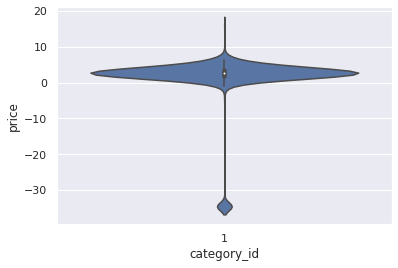

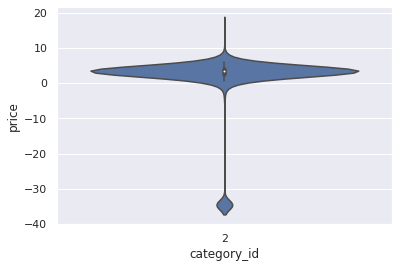

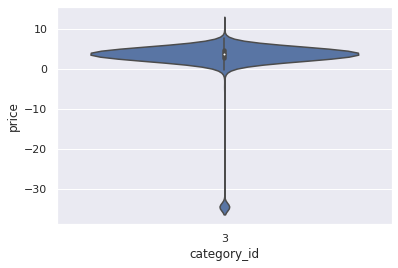

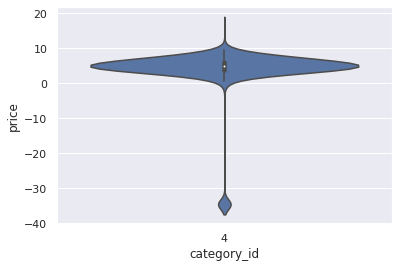

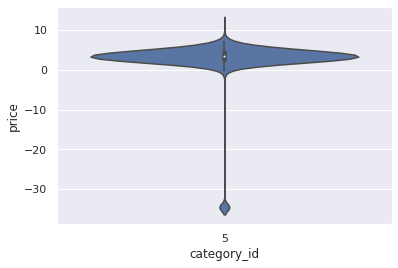

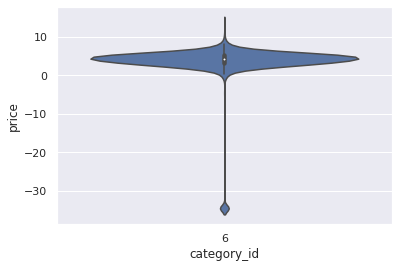

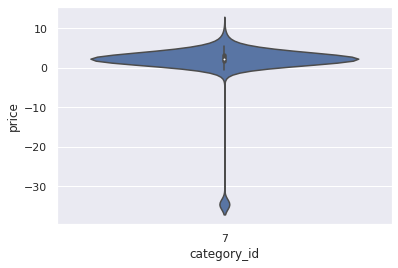

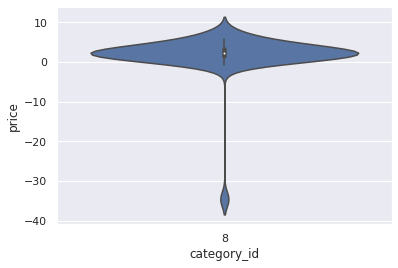

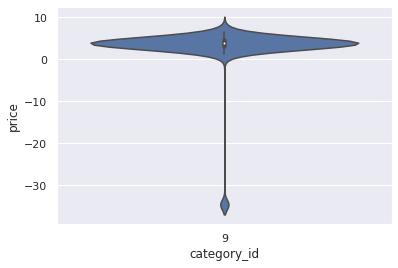

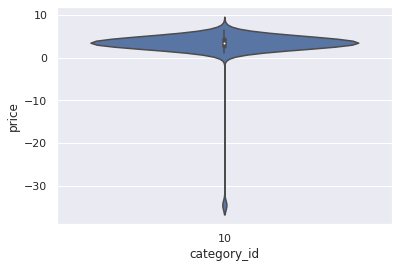

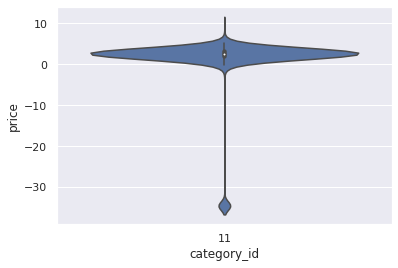

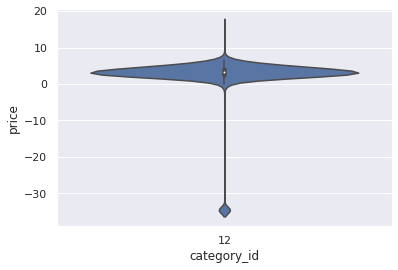

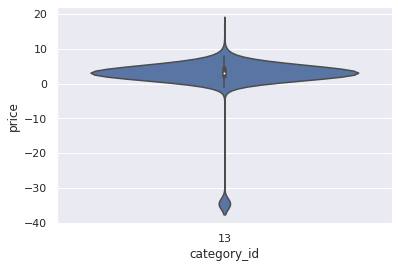

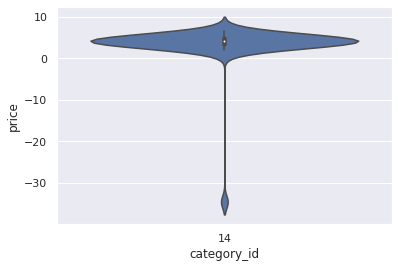

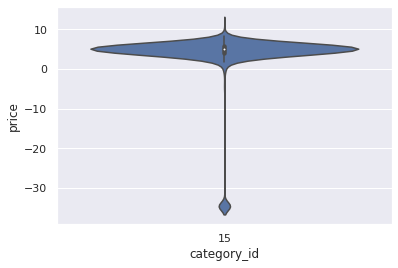

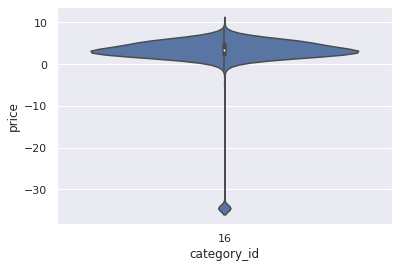

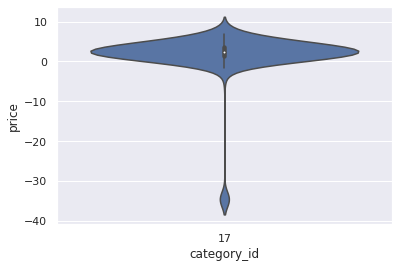

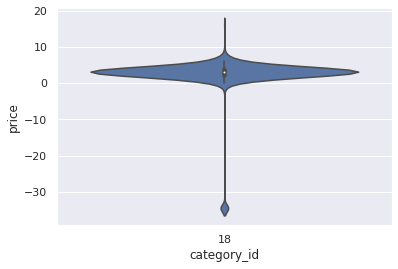

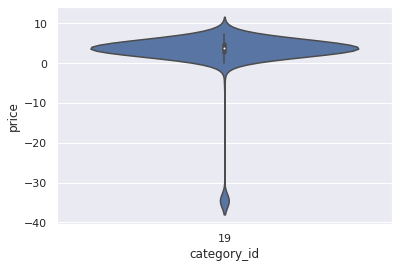

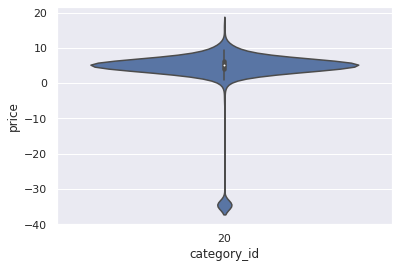

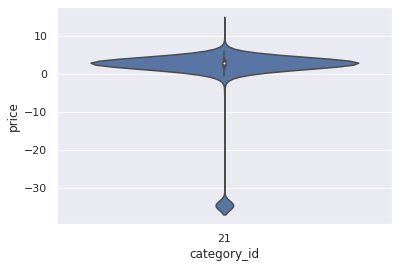

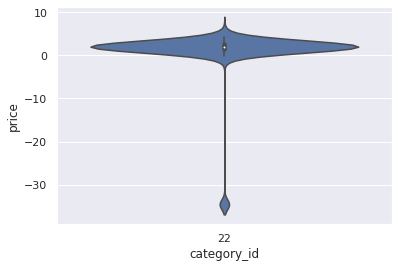

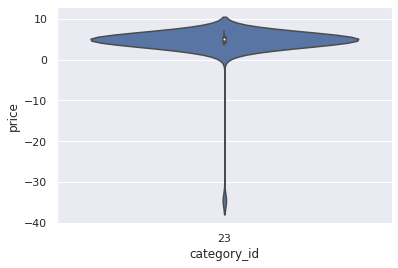

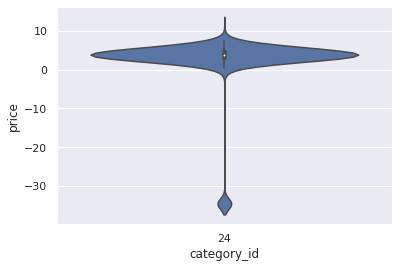

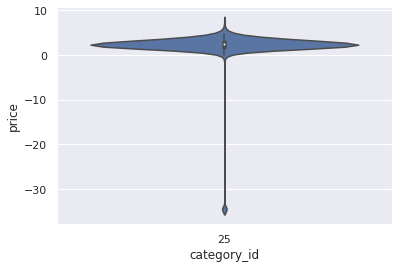

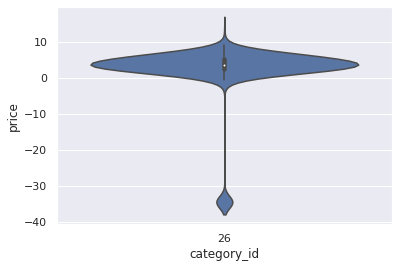

In [21]:
# Let's do a violin plot to study the price distribution for each 'category_id' after log transform
grouped_df = train_df.groupby("category_id")

for category_id, g_df in grouped_df:
    
    # Add 'category_id' to g_df
    g_df["category_id"] = category_id
    
    # Plot the violin plot
    sns.violinplot(
        data=g_df,
        x="category_id",
        y="price",
    )
    
    plt.show()

# Delete grouped_df to avoid further interferences
del grouped_df

Comments
-----

After we apply the log-transformation, the distribution of price between the different category_id, looks even more similar. The log transform is not optimal to help our algorithm distinguish between the different category_id,

### 3.4.3 - Analysis of low prices 

In [22]:
def filter_and_display_low_price_listings(df: pd.DataFrame, price_threshold: float=0.01) -> None:
    """Filter and display low price listings in df."""
    # Keep only high price listings
    temp_df = df[df["price"] < price_threshold]

    # Display the listings with high prices
    display_title(f"Listings with a price below {price_threshold} SGD")
    display_dataframe(temp_df)
    print(f"Number of listings with small price: {temp_df.shape[0]}")
    print("\n")

In [23]:
# Define a threshold for high prices transactions
LOW_PRICE_THRESHOLD = 0.01 # = 10 Millions

# Filter the dataFrame and display only listings with high prices
filter_and_display_low_price_listings(df=train_raw_df, price_threshold=LOW_PRICE_THRESHOLD)

-----  Listings with a price below 0.01 SGD  -----


,id,l1_category_name,l2_category_name,l3_category_name,title,category_id,price
140856,01904c6a-db2f-4306-9ec4-626c8de52add,Men's Fashion,Men's Watches,NaN,Dan Henry 1964 L.E. Chrono (38mm),20,0.0
140857,c0c88a03-191b-4943-bd07-a82f532f371a,Men's Fashion,Men's Watches,NaN,Limited Edition- Brand New - Ferrari Watch,20,0.0
140858,5527f074-332f-44b4-b3d9-ba0cef04378c,Men's Fashion,Men's Watches,NaN,Vintage Omega Geneve 166.0125\n\nAutomatic Pre Seamaster,20,0.0
140859,593171fe-d8e8-409e-b3f2-287f2aebc701,Men's Fashion,Men's Watches,NaN,AP watch,20,0.0
140860,8850797a-3135-429c-b8a3-1b6167c18457,Men's Fashion,Men's Watches,NaN,Panerai Luminor Marina(PM 417),20,0.0
140861,6859390f-1b1d-41f4-9fa9-0940a4ac6021,Men's Fashion,Men's Watches,NaN,Huawei GT2 Smart Watch,20,0.0
140862,282bf399-7bfd-491f-87d3-9e7e70d82722,Men's Fashion,Men's Watches,NaN,Vintage Watches for Sale Part 2,20,0.0
140863,1b7e17f7-4f45-40ec-86cf-d975cb456d60,Men's Fashion,Men's Watches,NaN,2020-CW-✅Pre-Order-Save 50%-Men's DIESEL Mr Daddy Blue Dial Quartz Chronograph Watch Steel Bracelet DZ7331-(NYB412020/U99-20)✅DIRECT SOURCE NO MIDDLEMEN,20,0.0
140864,ff295c48-a4fd-44ca-aeec-32ad1d6615ce,Men's Fashion,Men's Watches,NaN,-,20,0.0
140865,86b715c7-3552-49cd-9757-883a99758285,Men's Fashion,Men's Watches,NaN,1940’s LEMANIA UK Royal Navy Military HS9 Vintage Mechanical Winding Monopusher Chronograph Wrist Watch,20,0.0


Number of listings with small price: 3836




Comments
-----

With the analysis of the low prices listings, we can identify particular new cases:
    * The item is proposed for free
    * The item is opened for negotiation
    * Someone is looking for the item listed
    
Therefore, if we decide to use the price variable, we should be careful to deal with such listings with null or very small prices.

# 4 - Data Cleaning

In [28]:
# Preprocess the data
train_df = data_preprocessing(train_raw_df)
X_test_df = data_preprocessing(X_test_raw_df)

# Display the trabnsformed data
train_df.head()

,l1_category_name,l2_category_name,l3_category_name,title,category_id,price
id,,,,,,
7f1f33cf-a59a-4114-8f9e-cf3effaa2341,Men's Fashion,Men's Watches,NaN,Fossil Leather Watch,20,100.56
88765cd5-3f53-403c-841a-12dc367843c9,Men's Fashion,Men's Watches,NaN,* FREE DELIVERY * JDM Brand New 100% Authentic...,20,1008.37
264e2900-ba35-4ac0-8858-e2fcb0909e6d,Men's Fashion,Men's Watches,NaN,St Dupont Classic Pen,20,220.31
ffc7337a-7d04-4fa8-a136-ac9d8413f8e8,Men's Fashion,Men's Watches,NaN,CASIO G-SHOCK GX-56BB-1DR / GX-56BB-1D / GX-56...,20,104.95
34a2e32c-db54-4aff-b89d-173bacbac346,Men's Fashion,Men's Watches,NaN,Fossil Townsman Twist ME1164P,20,166.37


In [ ]:
## 4.3 - Check if some words of the test set are not present in the training set